# **Проект: анализ зарплат в России**

## Библиотеки

In [79]:
# pip install ydata_profiling -q

In [3]:
# pip install ipywidgets

In [1]:
import ydata_profiling
ydata_profiling.__version__

'v4.7.0'

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: f'{{:.2f}}'.format(x))

In [2]:
from ydata_profiling import ProfileReport

## *Часть 1*

##  Скачайте данные о "Среднемесячной номинальной начисленной заработной плате работников организаций по видам экономической деятельности в Российской Федерации за 2000-2023 гг."
- Выберите 2-3 вида экономической деятельности, наиболее интересные Вам. Постройте графики изменения зарплаты по годам для этих видов экономической деятельности. Сделайте выводы

Я выбрала для анализа среднемесячной зп по 3 видам экономической деятельности:
- строительство
- образование
- здравохранение

Уже сформированная таблица находится на моем гугл диске, считаем ее в переменную

In [81]:
df_sal=pd.read_csv('https://drive.google.com/u/0/uc?id=1qNr4Y8ZfVFL3goZavn_TyaTEfJ1LhIDl&export=download')

Посмотрим из чего она состоит, проведем анализ

In [82]:
df_sal.head()

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,строительство,2640,3859,4807,6177,7305,9043,10869,14333,18574,...,29354,29960,32332,33678,38518,42630,44738,51944,60850,68944
1,Образование,1240,1833,2927,3387,4203,5430,6983,8778,11317,...,25862,26928,28088,30258,34361,37072,39563,43391,48400,54263
2,Здравоохранение и предоставление социальных услуг,1333,1960,3141,3663,4612,5906,8060,10037,13049,...,27068,28179,29742,31980,40027,43122,49532,50690,55420,61486


Транспонируем ее, для удобства использования и проведения анализа

In [ ]:
df_sal_t=df_sal.T

In [ ]:
df_sal_t=df_sal_t.reset_index()

In [ ]:
df_sal_t.columns

Index(['index', 0, 1, 2], dtype='object')

In [ ]:
df_sal_t=df_sal_t.rename(columns={'index':'year',
                                          0 : 'building',
                                          1 : 'education',
                                          2: 'medicine',
                                                         })

In [ ]:
df_sal_t=df_sal_t[1:]
df_sal_t.head()

,year,building,education,medicine
1,2000,2640,1240,1333
2,2001,3859,1833,1960
3,2002,4807,2927,3141
4,2003,6177,3387,3663
5,2004,7305,4203,4612


У меня получилась таблица с 4 столбцами(год, и виды деятельности - строительство, образование и здравохранение), теперь проследить изменения в зп по видам деятельности и годам можно в отдельном столбце. Сохраним нашу полученную транспонированную таблицу для дальнейшего анализа, и чтобы заново не делать преобразования

In [ ]:
df_sal_t.reset_index(drop=True, inplace=True)

In [ ]:
df_sal_t

,year,building,education,medicine
0,2000,2640,1240,1333
1,2001,3859,1833,1960
2,2002,4807,2927,3141
3,2003,6177,3387,3663
4,2004,7305,4203,4612
5,2005,9043,5430,5906
6,2006,10869,6983,8060
7,2007,14333,8778,10037
8,2008,18574,11317,13049
9,2009,18122,13294,14820


In [ ]:
# df_sal_t.to_csv('df_sal_t.csv', index=False)

In [90]:
df_sal_t=pd.read_csv('https://drive.google.com/u/0/uc?id=17zTG5qpXhUWm3Y_ezr7TuYR5JotUwqLj&export=download')

In [84]:
df_sal_t.head()

,year,building,education,medicine
0,2000,2640,1240,1333
1,2001,3859,1833,1960
2,2002,4807,2927,3141
3,2003,6177,3387,3663
4,2004,7305,4203,4612


In [ ]:
df_sal_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       24 non-null     int64
 1   building   24 non-null     int64
 2   education  24 non-null     int64
 3   medicine   24 non-null     int64
dtypes: int64(4)
memory usage: 896.0 bytes


Создадим отчет об анализе с помощью специальной библиотеки profile

In [ ]:
profile = ProfileReport(df_sal_t, title="Salary Dataset", html={'style': {'full_width': True}})

In [ ]:
# profile.to_file("salary_report.html")

In [ ]:
ProfileReport(df_sal_t, title="Salary Report")

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


Как видно из нашего отчета:
- всего у нас получилось 24 строки и 4 столбца
- в данных нет пропусков и дубликатов
- все данные очень сильно коррелированы между собой (0,99), это понятно, все зп одновременно повышались с 2000 до 2023г.
- самые большие зп на момент 2023г в строительстве -выросли с 2640р до 68944р, потом идет медицина с 1333р до 61486р, на третьем месте зп в образовании - с 1240р до 54263р.

Построим график, чтобы отобразить кривые значений зп сразу по 3 видам деятельности без учета инфляции

In [91]:
df_sal_t.columns

Index(['year', 'building', 'education', 'medicine'], dtype='object')

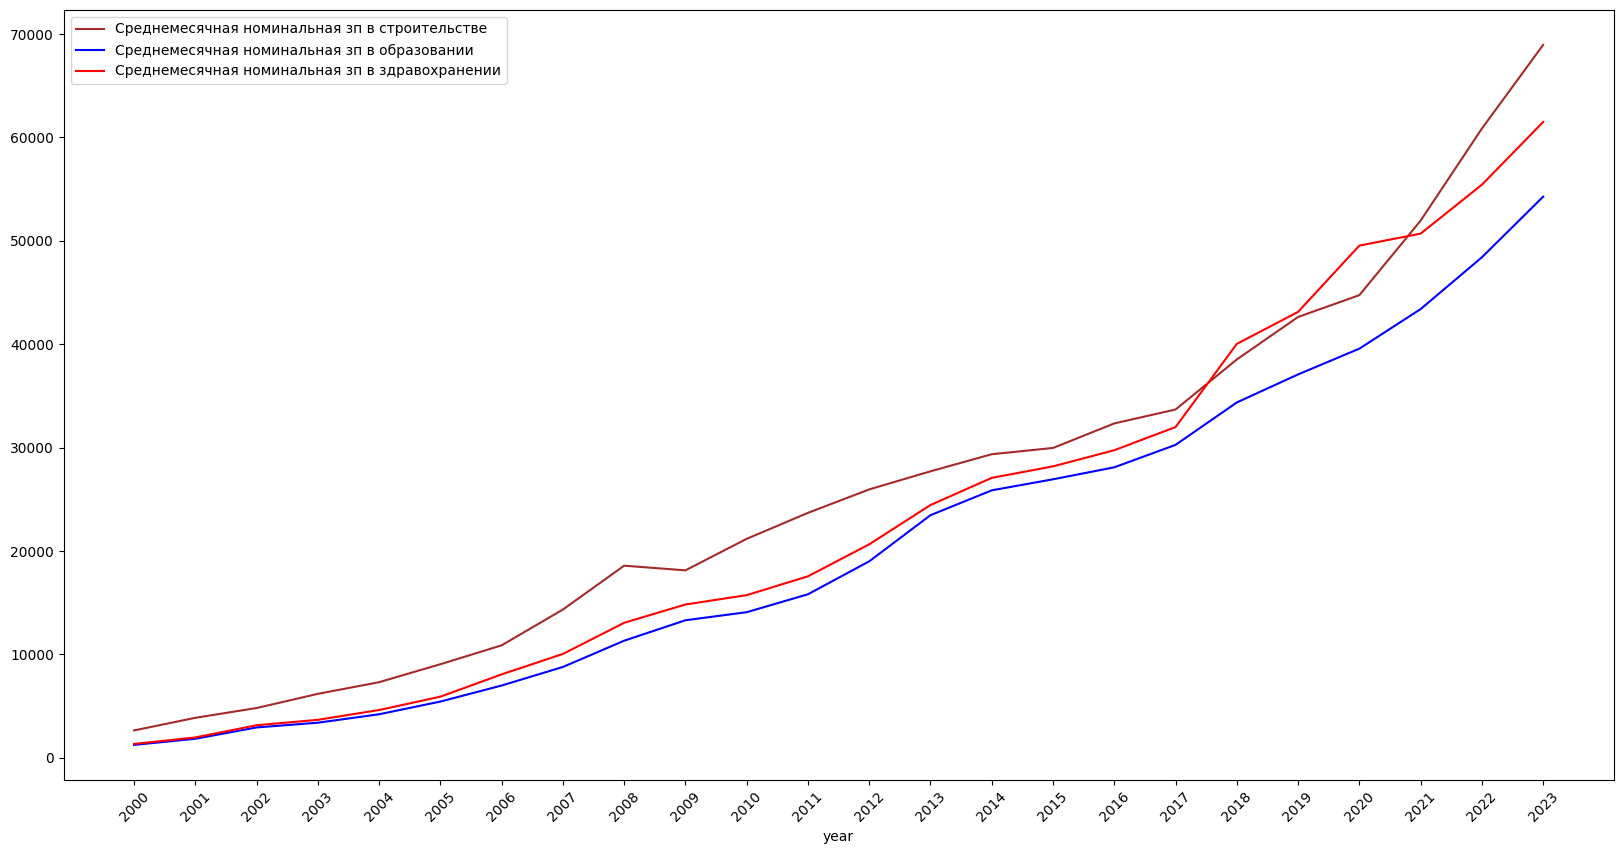

In [127]:
ax=df_sal_t.plot(x = 'year', y=['building', 'education', 'medicine'], color = ['brown', 'blue', 'red'], rot=45, fontsize=10, figsize=(20,10))
# Добавляем метки к графику
ax.legend(labels=['Среднемесячная номинальная зп в строительстве', 'Среднемесячная номинальная зп в образовании', 'Среднемесячная номинальная зп в здравохранении'])
plt.xticks(range(min(df_sal_t['year']), max(df_sal_t['year'])+1, 1))
# Показываем график
plt.show()

Вывод:
- Если смотреть на графики роста зп по годам и видам деятельности, то видим,что, начиная с 2019 года, уровень номинальной зп в медицине обогнал значения зп в образовании и строительстве, это было связано с пандемией ковида (доплатами за работу в ковидных стационарах) в это время и закрытием строительных предприятий на lockdown. После завершения пандемии строительство возобновилось и уровень зп в строительстве снова превышает уровень зп в медицине и в образовании.

## Скачайте данные об уровне инфляции в стране

Уже сформированная таблица со значениями инфляции с 2000г по 2023г. находится на моем гугл диске, считаем ее в переменную

In [92]:
df_infl=pd.read_csv('https://drive.google.com/u/0/uc?id=1clkLTWjjHUwyfmMVeRyOOW5Y8XuycqfA&export=download')

In [87]:
df_infl

,Год,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
0,2023,11.76,10.97,3.51,2.30,2.50,3.24,4.30,5.13,6.00,6.68,7.47,7.42,7.42
1,2022,8.74,9.16,16.70,17.83,17.11,15.90,15.09,14.30,13.67,12.63,11.97,11.92,11.92
2,2021,5.19,5.67,5.78,5.52,6.01,6.51,6.47,6.69,7.41,8.14,8.40,8.39,8.39
3,2020,2.42,2.31,2.55,3.10,3.03,3.21,3.37,3.57,3.67,3.98,4.42,4.91,4.91
4,2019,5.00,5.24,5.27,5.17,5.13,4.66,4.59,4.33,3.99,3.77,3.54,3.05,3.05
5,2018,2.21,2.20,2.36,2.41,2.42,2.30,2.50,3.07,3.39,3.55,3.83,4.27,4.27
6,2017,5.02,4.59,4.25,4.13,4.09,4.35,3.86,3.29,2.96,2.73,2.50,2.52,2.52
7,2016,9.77,8.06,7.26,7.24,7.30,7.48,7.21,6.84,6.42,6.09,5.76,5.38,5.38
8,2015,14.97,16.71,16.93,16.42,15.78,15.29,15.64,15.77,15.68,15.59,14.98,12.91,12.91
9,2014,6.05,6.20,6.92,7.33,7.59,7.80,7.45,7.56,8.03,8.30,9.07,11.36,11.36


In [ ]:
df_infl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Год     24 non-null     int64  
 1   Янв     24 non-null     float64
 2   Фев     24 non-null     float64
 3   Мар     24 non-null     float64
 4   Апр     24 non-null     float64
 5   Май     24 non-null     float64
 6   Июн     24 non-null     float64
 7   Июл     24 non-null     float64
 8   Авг     24 non-null     float64
 9   Сен     24 non-null     float64
 10  Окт     24 non-null     float64
 11  Ноя     24 non-null     float64
 12  Дек     24 non-null     float64
 13  Всего   24 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.8 KB


Построим график изменения значений инфляции с 2000 по 2023 годы

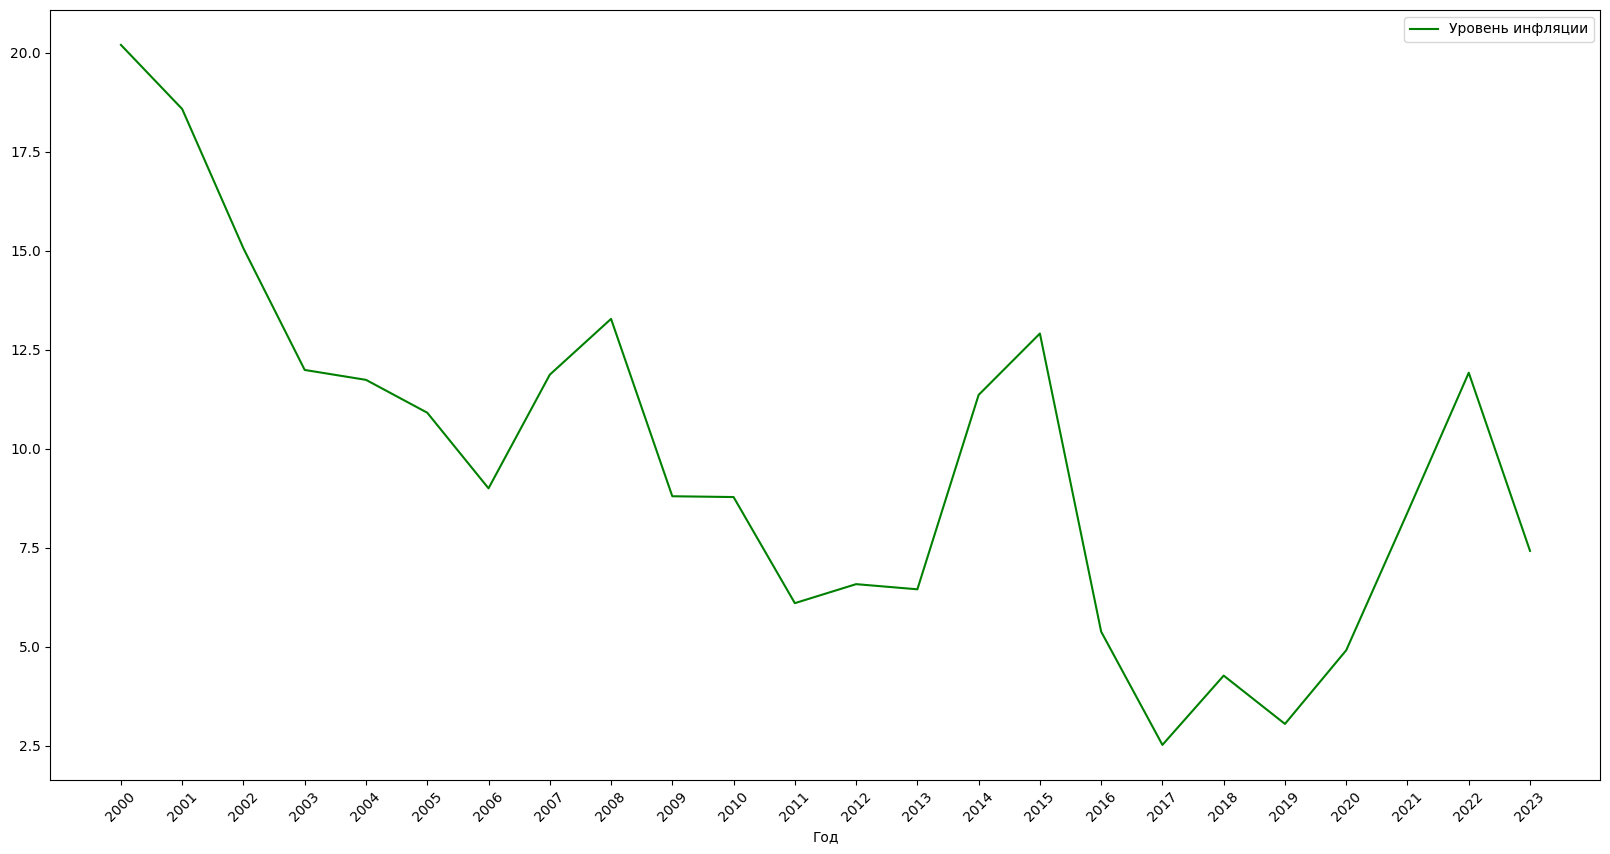

In [128]:
ax=df_infl.plot(x = 'Год', y=['Всего'], color = ['green'], rot=45, fontsize=10, figsize=(20,10))
# Добавляем метки к графику
ax.legend(labels=['Уровень инфляции'])
plt.xticks(range(min(df_infl['Год']), max(df_infl['Год'])+1, 1))
# Показываем график
plt.show()

Найдем год с минимальным значением инфляции

In [ ]:
df_infl.loc[df_infl['Всего'].idxmin(), :]

Год      2017.00
Янв         5.02
Фев         4.59
Мар         4.25
Апр         4.13
Май         4.09
Июн         4.35
Июл         3.86
Авг         3.29
Сен         2.96
Окт         2.73
Ноя         2.50
Дек         2.52
Всего       2.52
Name: 6, dtype: float64

Найдем год с максимальным значением инфляции

In [ ]:
df_infl.loc[df_infl['Всего'].idxmax(), :]

Год      2000.00
Янв        28.93
Фев        25.11
Мар        22.49
Апр        19.95
Май        19.40
Июн        20.15
Июл        18.94
Авг        18.73
Сен        18.54
Окт        19.41
Ноя        19.75
Дек        20.20
Всего      20.20
Name: 23, dtype: float64

Выводы:
- датасет с данными по инфляции также состоит из 24 строки 14 столбцов, нас интересует столбец с годом и средним значением инфляции за год ('Год', 'Всего')
- в данных нет пропусков и дубликатов
- самая маленькая инфляция была в 2017г - 2,52
- самая большая инфляция была в 2000г - 20,20 - это отголоски дефолта рубля в 1998г.
- также видим зависимость повышения уровня инфляции в 2008г, 2014-2015г, 2022г, связанную с геополитической ситуацией нашей страны.


## Пересчитайте средние зарплаты с учетом уровня инфляции и сравните, как влияет инфляция на изменение зарплаты по сравнению с предыдущим годом

Соединим 2 таблицы в одну

In [93]:
df_infl=df_infl.sort_values(by='Год')

In [94]:
df_infl.reset_index(drop=True, inplace=True)

In [95]:
df_sal_a=pd.merge(df_sal_t, df_infl['Всего'], left_index=True, right_index=True, how='outer')

In [96]:
df_sal_a

,year,building,education,medicine,Всего
0,2000,2640,1240,1333,20.20
1,2001,3859,1833,1960,18.58
2,2002,4807,2927,3141,15.06
3,2003,6177,3387,3663,11.99
4,2004,7305,4203,4612,11.74
5,2005,9043,5430,5906,10.91
6,2006,10869,6983,8060,9.00
7,2007,14333,8778,10037,11.87
8,2008,18574,11317,13049,13.28
9,2009,18122,13294,14820,8.80


Пересчитаем средние зарплаты с учетом уровня инфляции и получим реальные среднемесячные зп по видам деятельности.

In [97]:
df_sal_a['real_sal_build']=df_sal_a.building-(df_sal_a.building*df_sal_a.Всего/100)
df_sal_a['real_sal_med']=df_sal_a.medicine-(df_sal_a.medicine*df_sal_a.Всего/100)
df_sal_a['real_sal_educ']=df_sal_a.education-(df_sal_a.education*df_sal_a.Всего/100)

Посчитаем насколько проиндексировали (повысили) номинальные среднемесячные зп по сравнению с предыдущим годом (столбцы ind_b, ind_m, ind_e)

In [98]:
df_sal_a[['dif_b', 'dif_e', 'dif_m']] = df_sal_a[['building', 'education', 'medicine']].shift(1)

In [99]:
df_sal_a[['dif_rb', 'dif_rm', 'dif_re']] = df_sal_a[['real_sal_build', 'real_sal_med', 'real_sal_educ']].shift(1)

In [100]:
df_sal_a['ind_b']= (df_sal_a['building'] - df_sal_a['dif_b'])/df_sal_a['dif_b']*100
df_sal_a['ind_e']= (df_sal_a['education'] - df_sal_a['dif_e'])/df_sal_a['dif_e']*100
df_sal_a['ind_m']= (df_sal_a['medicine'] - df_sal_a['dif_m'])/df_sal_a['dif_m']*100

Посчитаем насколько реально повысилась реальная среднемесячная зп с учетом инфляции по сравнению с предыдущим годом (столбцы ind_rb, ind_rm, ind_re)

In [101]:
df_sal_a['ind_rb']= (df_sal_a['real_sal_build'] - df_sal_a['dif_rb'])/df_sal_a['dif_rb']*100
df_sal_a['ind_rm']= (df_sal_a['real_sal_med'] - df_sal_a['dif_rm'])/df_sal_a['dif_rm']*100
df_sal_a['ind_re']= (df_sal_a['real_sal_educ'] - df_sal_a['dif_re'])/df_sal_a['dif_re']*100

Посчитаем фактический индекс повышения номинальной и рельной зп с учетом уровня инфляции

In [102]:
df_sal_a['ind_rb_infl']= df_sal_a['ind_rb'] - df_sal_a['Всего']
df_sal_a['ind_re_infl']= df_sal_a['ind_re'] - df_sal_a['Всего']
df_sal_a['ind_rm_infl']= df_sal_a['ind_rm'] - df_sal_a['Всего']
df_sal_a['ind_b_infl']= df_sal_a['ind_b'] - df_sal_a['Всего']
df_sal_a['ind_e_infl']= df_sal_a['ind_e'] - df_sal_a['Всего']
df_sal_a['ind_m_infl']= df_sal_a['ind_m'] - df_sal_a['Всего']

Соберем все в одну таблицу и сохраним,чтобы не делать эти преобразования снова

In [103]:
df_sal_a.columns

Index(['year', 'building', 'education', 'medicine', 'Всего', 'real_sal_build',
       'real_sal_med', 'real_sal_educ', 'dif_b', 'dif_e', 'dif_m', 'dif_rb',
       'dif_rm', 'dif_re', 'ind_b', 'ind_e', 'ind_m', 'ind_rb', 'ind_rm',
       'ind_re', 'ind_rb_infl', 'ind_re_infl', 'ind_rm_infl', 'ind_b_infl',
       'ind_e_infl', 'ind_m_infl'],
      dtype='object')

In [104]:
df_sal_ind=df_sal_a[['year', 'Всего', 'building', 'real_sal_build', 'ind_b','ind_b_infl', 'ind_rb','ind_rb_infl','education','real_sal_educ','ind_e','ind_e_infl',
                     'ind_re','ind_re_infl',
                     'medicine', 'real_sal_med', 'ind_m', 'ind_m_infl', 'ind_rm','ind_rm_infl'  ]].copy()

In [118]:
df_sal_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            24 non-null     int64  
 1   Всего           24 non-null     float64
 2   building        24 non-null     int64  
 3   real_sal_build  24 non-null     float64
 4   ind_b           23 non-null     float64
 5   ind_b_infl      23 non-null     float64
 6   ind_rb          23 non-null     float64
 7   ind_rb_infl     23 non-null     float64
 8   education       24 non-null     int64  
 9   real_sal_educ   24 non-null     float64
 10  ind_e           23 non-null     float64
 11  ind_e_infl      23 non-null     float64
 12  ind_re          23 non-null     float64
 13  ind_re_infl     23 non-null     float64
 14  medicine        24 non-null     int64  
 15  real_sal_med    24 non-null     float64
 16  ind_m           23 non-null     float64
 17  ind_m_infl      23 non-null     float

In [105]:
# df_sal_ind.to_csv('df_sal_ind.csv', index=False)

Можно скачать сохраненную таблицу на моем гуглдиске

In [106]:
df_sal_ind=pd.read_csv('https://drive.google.com/u/0/uc?id=1N32qkJvC_QkSKiOQV1owmtkwh6KQhvOM&export=download')
df_sal_ind

,year,Всего,building,real_sal_build,ind_b,ind_b_infl,ind_rb,ind_rb_infl,education,real_sal_educ,ind_e,ind_e_infl,ind_re,ind_re_infl,medicine,real_sal_med,ind_m,ind_m_infl,ind_rm,ind_rm_infl
0,2000,20.20,2640,2106.72,NaN,NaN,NaN,NaN,1240,989.52,NaN,NaN,NaN,NaN,1333,1063.73,NaN,NaN,NaN,NaN
1,2001,18.58,3859,3142.00,46.17,27.59,49.14,30.56,1833,1492.43,47.82,29.24,50.82,32.24,1960,1595.83,47.04,28.46,50.02,31.44
2,2002,15.06,4807,4083.07,24.57,9.51,29.95,14.89,2927,2486.19,59.68,44.62,66.59,51.53,3141,2667.97,60.26,45.20,67.18,52.12
3,2003,11.99,6177,5436.38,28.50,16.51,33.14,21.15,3387,2980.90,15.72,3.73,19.90,7.91,3663,3223.81,16.62,4.63,20.83,8.84
4,2004,11.74,7305,6447.39,18.26,6.52,18.60,6.86,4203,3709.57,24.09,12.35,24.44,12.70,4612,4070.55,25.91,14.17,26.27,14.53
5,2005,10.91,9043,8056.41,23.79,12.88,24.96,14.05,5430,4837.59,29.19,18.28,30.41,19.50,5906,5261.66,28.06,17.15,29.26,18.35
6,2006,9.00,10869,9890.79,20.19,11.19,22.77,13.77,6983,6354.53,28.60,19.60,31.36,22.36,8060,7334.60,36.47,27.47,39.40,30.40
7,2007,11.87,14333,12631.67,31.87,20.00,27.71,15.84,8778,7736.05,25.71,13.84,21.74,9.87,10037,8845.61,24.53,12.66,20.60,8.73
8,2008,13.28,18574,16107.37,29.59,16.31,27.52,14.24,11317,9814.10,28.92,15.64,26.86,13.58,13049,11316.09,30.01,16.73,27.93,14.65
9,2009,8.80,18122,16527.26,-2.43,-11.23,2.61,-6.19,13294,12124.13,17.47,8.67,23.54,14.74,14820,13515.84,13.57,4.77,19.44,10.64


Столбцы и их значения:
- 'year' - год
- 'Всего' - уровень инфляции общий за год
- 'building' - номинальная зп в строительстве
- 'real_sal_build' - реальная зп с учетом инфляции в строительстве
- 'ind_b' - индекс повышения номин. зп по сравнению с предыд. годом в строительстве
- 'ind_b_infl'- индекс повышения номин. зп по сравнению с предыд. годом с учетом инфляции в этом году в строительстве
- 'ind_rb'-  индекс повышения реальной зп по сравнению с предыд. годом в строительстве
- 'ind_rb_infl'-  индекс повышения реальной зп по сравнению с предыд. годом с учетом инфляции в этом году в строительстве
- 'education'- номинальная зп в образовании
- 'real_sal_educ'- реальная зп с учетом инфляции в образовании
- 'ind_e'- индекс повышения номин. зп по сравнению с предыд. годом в образовании
- 'ind_e_infl'- индекс повышения номин. зп по сравнению с предыд. годом с учетом инфляции в этом году  в образовании
- 'ind_re'- индекс повышения реальной зп по сравнению с предыд. годом в образовании
- 'ind_re_infl'-  индекс повышения реальной зп по сравнению с предыд. годом с учетом инфляции в этом году в образовании
- 'medicine'- номинальная зп в здавохранении
- 'real_sal_med'- реальная зп с учетом инфляции в здавохранении
- 'ind_m'- индекс повышения номин. зп по сравнению с предыд. годом в здравохранении
- 'ind_m_infl'- индекс повышения номин. зп по сравнению с предыд. годом с учетом инфляции в этом году в здравохранении
- 'ind_rm'- индекс повышения реальной зп по сравнению с предыд. годом в здравохранении
- 'ind_rm_infl'-  индекс повышения реальной зп по сравнению с предыд. годом с учетом инфляции в этом году в здравохранении

Выводы:
- если смотреть по таблице, то конечно номинальная и реальная зп отличаются по всем видам деятельности, потому что на нее влияет уровень инфляции, реальная зп меньше, чем номинальная зп.
- если сравнивать по процентам индексирования зп, то например, в 2001г по сравнению с 2000г в строительстве номинальная зп увеличилась на 46,17%, реальная зп увеличилась на 49,14%, но с учетом инфляции в 2001г-18,58% фактическое увеличение номинальной зп составило- 27,59%, а реальной зп - 30,56%

## Выберите подходящие визуализации и отобразите динамику изменения реальных зарплат с учетом инфляции. Сделайте выводы

In [107]:
df_sal_ind.columns

Index(['year', 'Всего', 'building', 'real_sal_build', 'ind_b', 'ind_b_infl',
       'ind_rb', 'ind_rb_infl', 'education', 'real_sal_educ', 'ind_e',
       'ind_e_infl', 'ind_re', 'ind_re_infl', 'medicine', 'real_sal_med',
       'ind_m', 'ind_m_infl', 'ind_rm', 'ind_rm_infl'],
      dtype='object')

Построим график, чтобы отобразить кривые значений реальных зп сразу по 3 видам деятельности с учетом инфляции

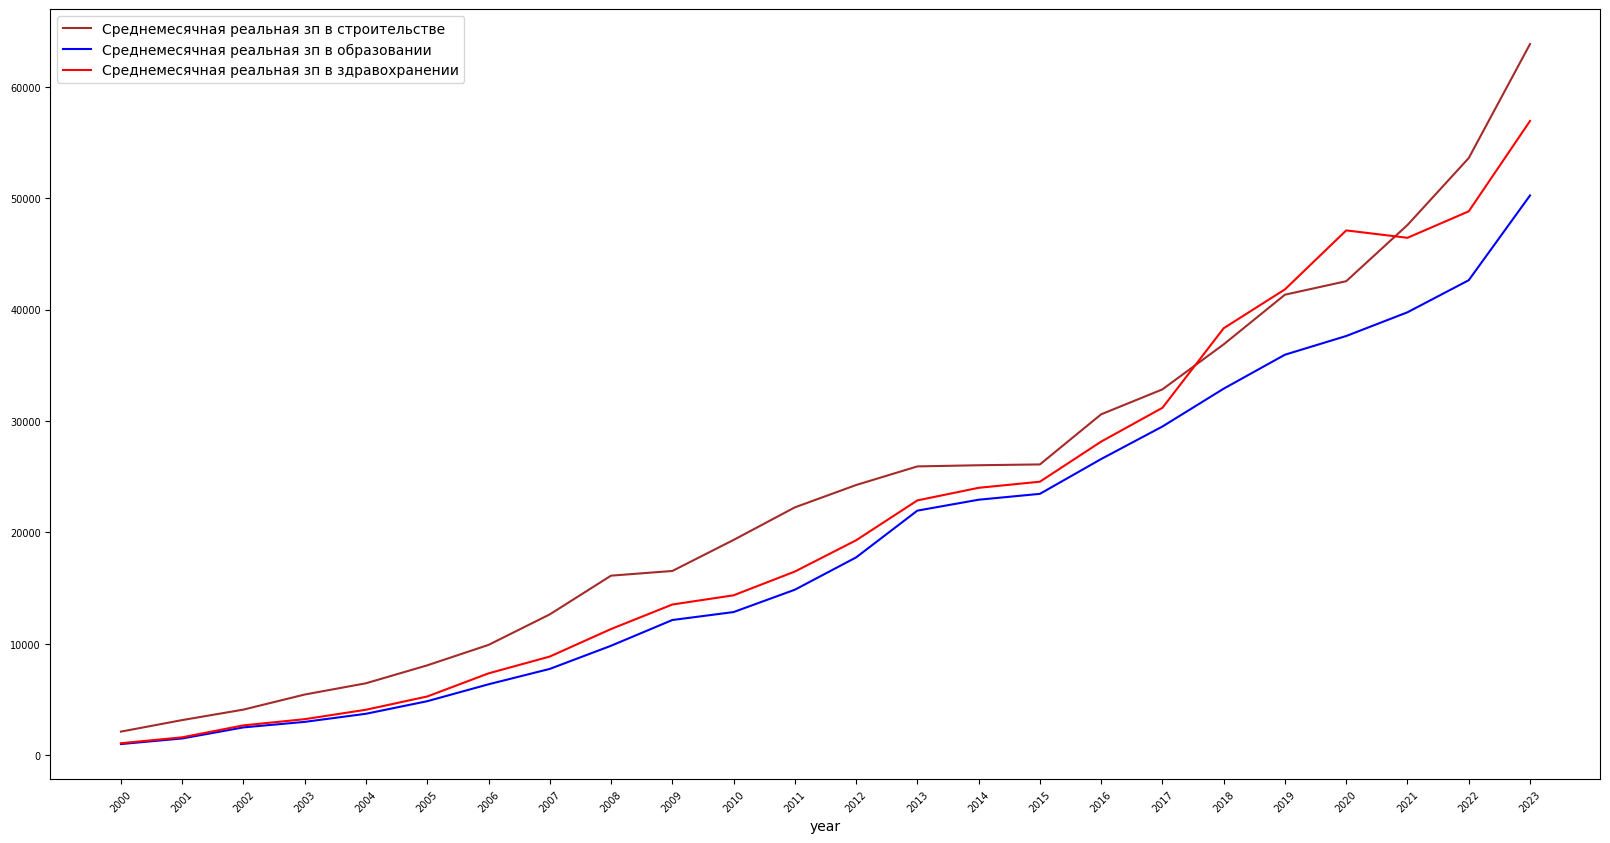

In [129]:
ax=df_sal_ind.plot(x = 'year', y=['real_sal_build', 'real_sal_educ', 'real_sal_med'], color = ['brown', 'blue', 'red'], rot=45, fontsize=7, figsize=(20,10))
# Добавляем метки к графику
ax.legend(labels=['Среднемесячная реальная зп в строительстве', 'Среднемесячная реальная зп в образовании', 'Среднемесячная реальная зп в здравохранении'])
plt.xticks(range(min(df_sal_ind['year']), max(df_sal_ind['year'])+1, 1))
# Показываем график
plt.show()

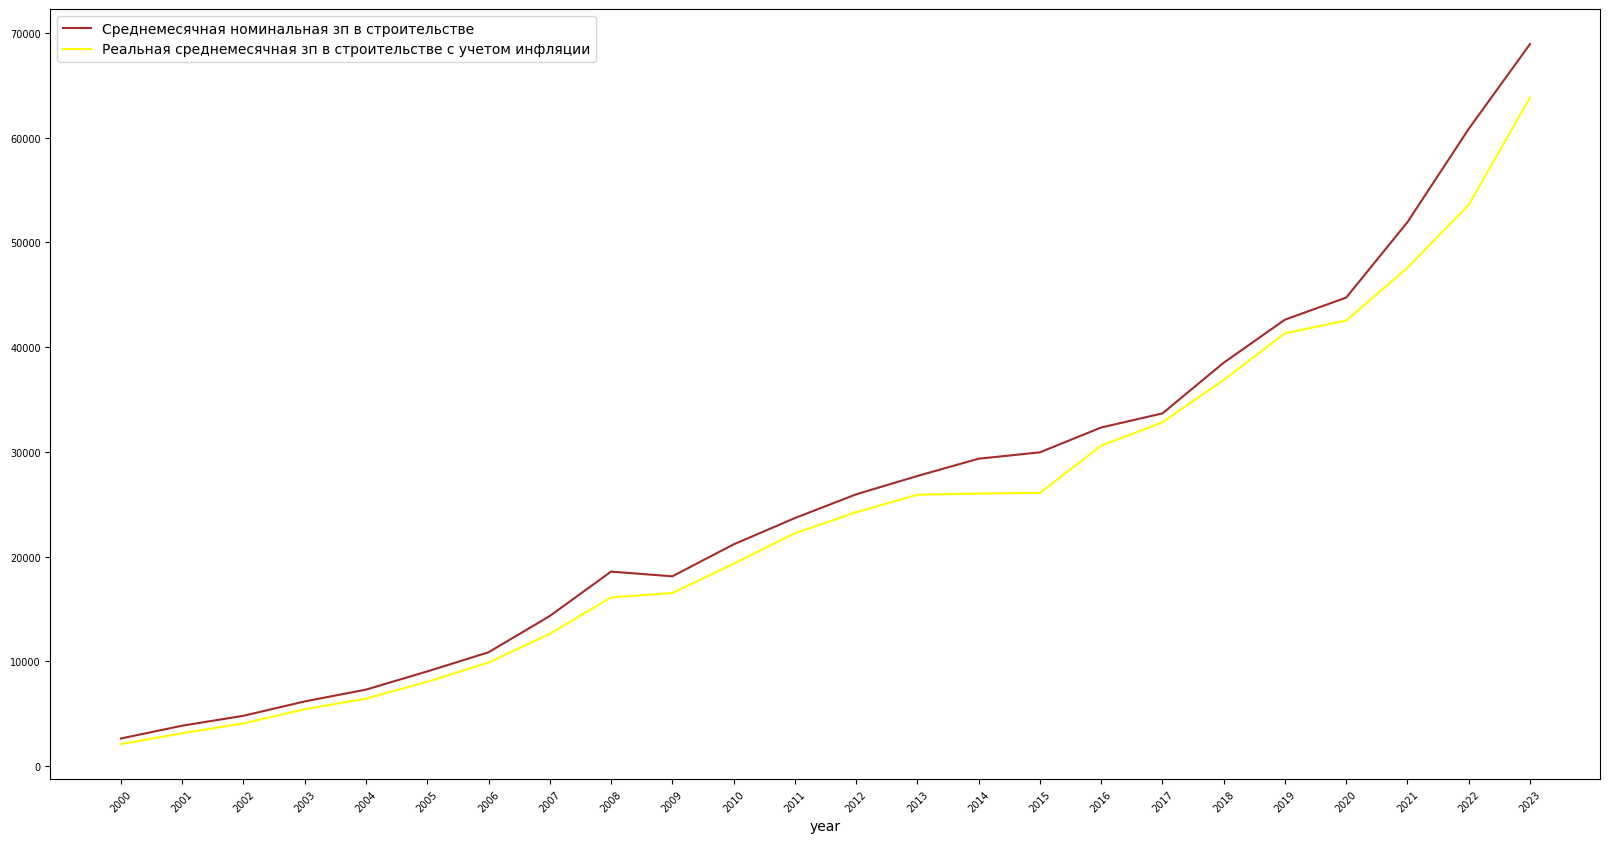

In [130]:
ax=df_sal_ind.plot(x = 'year', y=['building', 'real_sal_build'],
                color = ['brown','yellow'], rot=45, fontsize=7, figsize=(20,10))
# Добавляем метки к графику
ax.legend(labels=['Среднемесячная номинальная зп в строительстве', 'Реальная среднемесячная зп в строительстве с учетом инфляции'])
plt.xticks(range(min(df_sal_ind['year']), max(df_sal_ind['year'])+1, 1))
# Показываем график
plt.show()

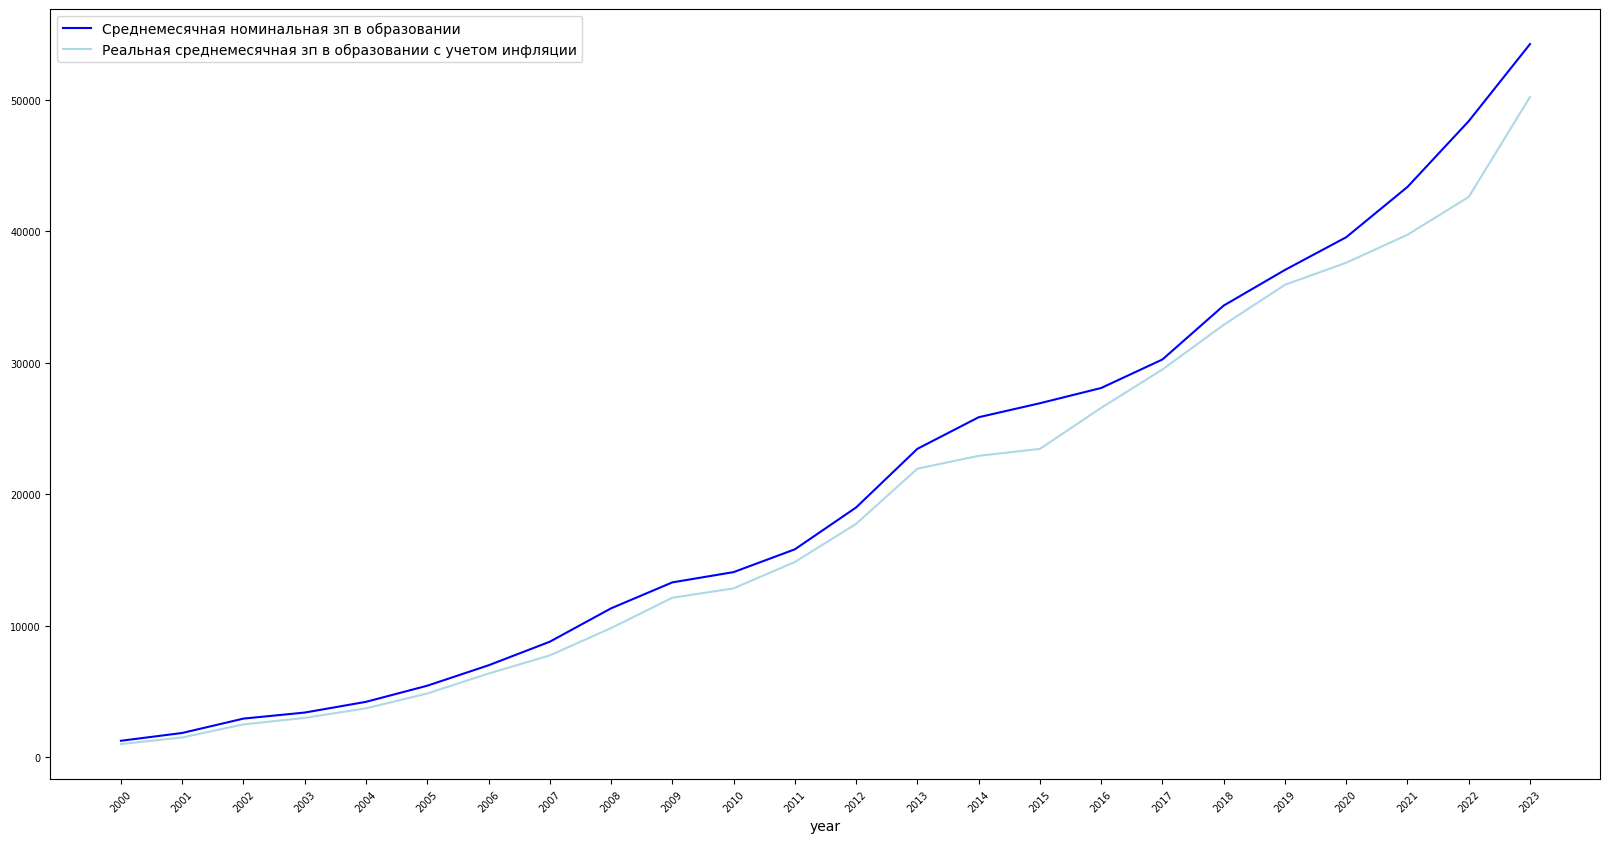

In [131]:
ax=df_sal_ind.plot(x = 'year', y=['education', 'real_sal_educ'],
                color = ['blue','lightblue'], rot=45, fontsize=7, figsize=(20,10))
# Добавляем метки к графику
ax.legend(labels=['Среднемесячная номинальная зп в образовании', 'Реальная среднемесячная зп в образовании с учетом инфляции'])
plt.xticks(range(min(df_sal_ind['year']), max(df_sal_ind['year'])+1, 1))
# Показываем график
plt.show()

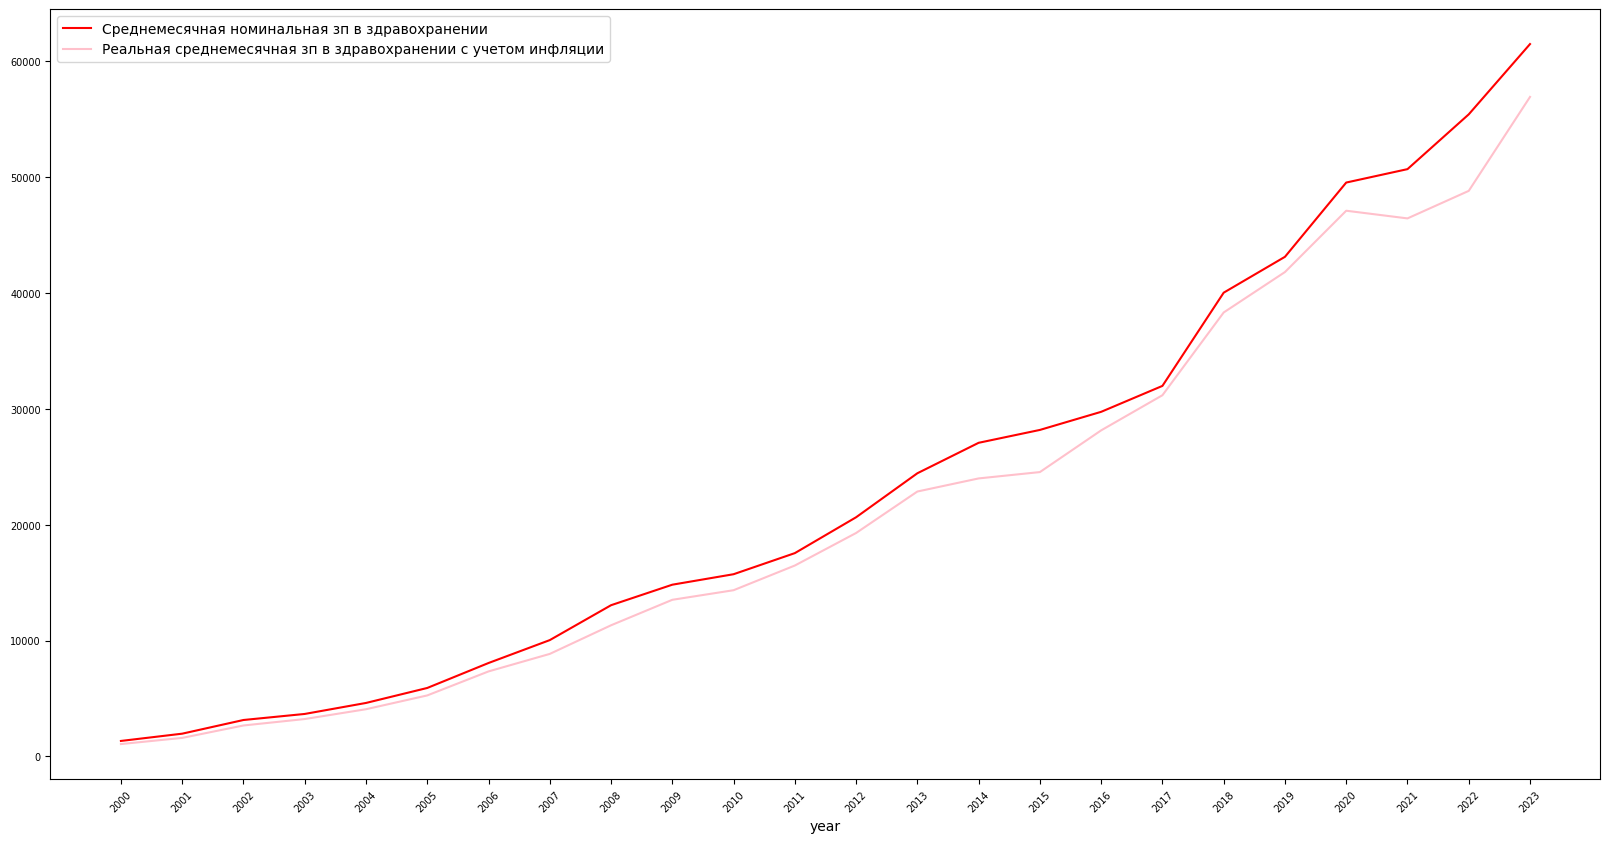

In [132]:
# Создаем график
ax = df_sal_ind.plot(x='year', y=['medicine', 'real_sal_med'], color=['red', 'pink'], rot=45, fontsize=7, figsize=(20,10))

# Добавляем метки к графику
ax.legend(labels=['Среднемесячная номинальная зп в здравохранении', 'Реальная среднемесячная зп в здравохранении с учетом инфляции'])
plt.xticks(range(min(df_sal_ind['year']), max(df_sal_ind['year'])+1, 1))
# Показываем график
plt.show()

Выводы:
- 4 графика, на которых визуализированы по годам среднемесячные номинальные и реальные зп по 3 видам деятельности подтверждают,что рельные зп работников меньше, чем номинальные зп, потому что индексирование зп не покрывает уровень инфляции. Особенно это видно в 2008-2009г, 2014-2015г, 2022г, что связано с геополитическими событиями в нашей стране.

Ниже построены графики сравнения значений инфляции, индексов повышения зп по видам деятельности, и индексы фактического повышения рельной зп с учетом инфляции

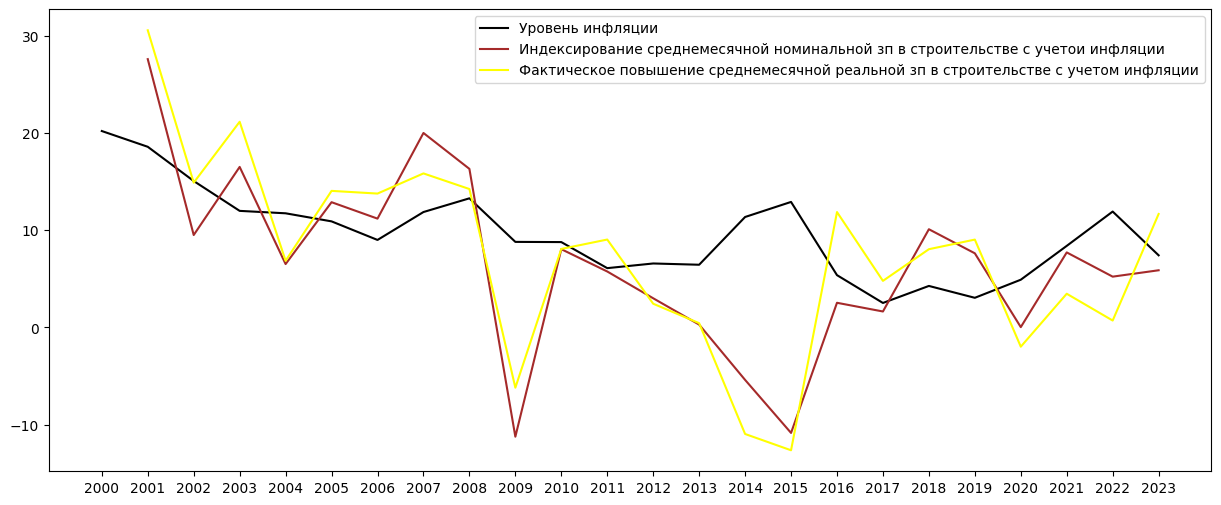

In [111]:
plt.figure(figsize=(15,6))
plt.plot(df_sal_ind['year'], df_sal_ind[['Всего']], color='black', label='Уровень инфляции')
plt.plot(df_sal_ind['year'], df_sal_ind[['ind_b_infl']], color='brown', label='Индексирование среднемесячной номинальной зп в строительстве с учетои инфляции')
plt.plot(df_sal_ind['year'], df_sal_ind[['ind_rb_infl']], color='yellow', label='Фактическое повышение среднемесячной реальной зп в строительстве с учетом инфляции')
plt.xticks(range(min(df_sal_ind['year']), max(df_sal_ind['year'])+1, 1))
plt.legend()
plt.show()


Вывод:
- в строительстве в начале 2000-х годов индексирование зп как рельных, так и номинальных превосходило уровень инфляции, было больше 20%. Резкое снижение реальных зп произошло в 2004, 2009, 2014-2015, 2020-2021, 2022 - это было связано с геополитической ситуацией в стране и в мире, а также пандемия ковида повлияла в 2020-2021. Инфляция съедала повышение зп даже в минус.
- также фактическое повышение реальной зп превышало уровень инфляции с 2016-2019гг, но не больше 20% как в начале 2000-х г.

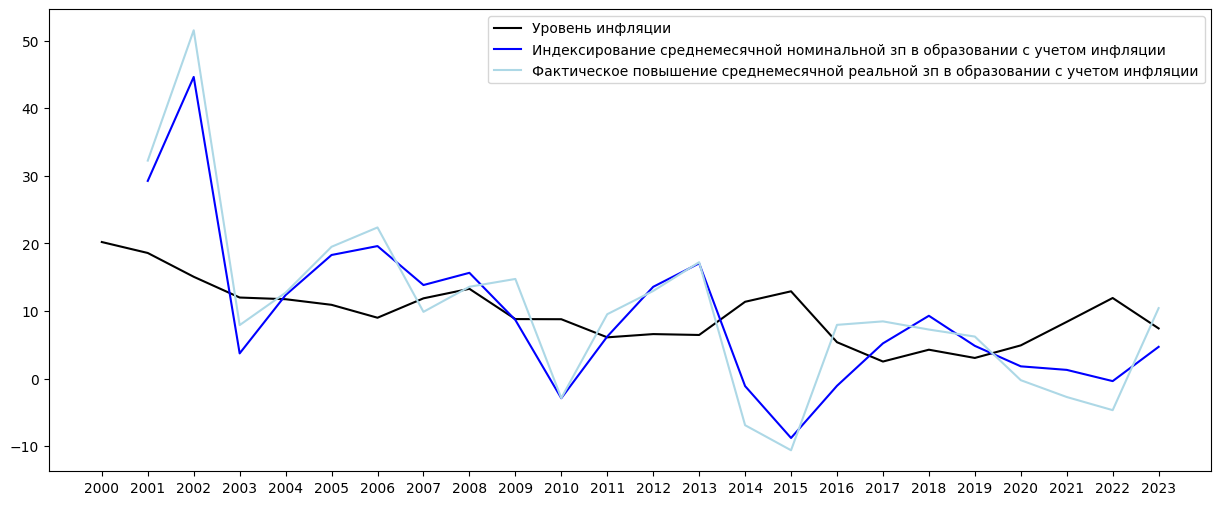

In [112]:
plt.figure(figsize=(15,6))
plt.plot(df_sal_ind['year'], df_sal_ind[['Всего']], color='black', label='Уровень инфляции')
plt.plot(df_sal_ind['year'], df_sal_ind[['ind_e_infl']], color='blue', label='Индексирование среднемесячной номинальной зп в образовании с учетом инфляции')
plt.plot(df_sal_ind['year'], df_sal_ind[['ind_re_infl']], color='lightblue', label='Фактическое повышение среднемесячной реальной зп в образовании с учетом инфляции')
plt.xticks(range(min(df_sal_ind['year']), max(df_sal_ind['year'])+1, 1))
plt.legend()
plt.show()

Вывод:
- в образовании  в начале 2000-х индексирование зп как рельных, так и номинальных превосходило уровень инфляции, было больше 20%, доходило до 50%. Резкое снижение реальных зп произошло в 2003, 2010,2014-2015, 2020-2022 - скорее всего это также было связано с геополитической ситуацией в стране.Уровень инфляции значительно превысил реальные и номинальные зп.
- также фактическое повышение реальной зп превышало уровень инфляции с 2004-2008,2011-2013, 2017-2019гг, доходило до 20% повышение

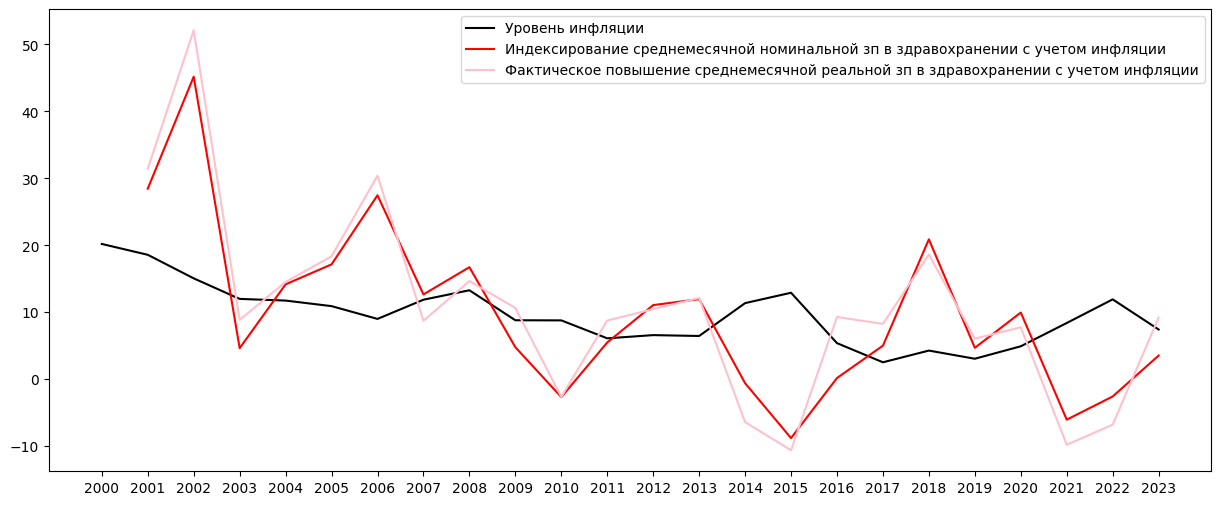

In [133]:
plt.figure(figsize=(15,6))
plt.plot(df_sal_ind['year'], df_sal_ind[['Всего']], color='black', label='Уровень инфляции')
plt.plot(df_sal_ind['year'], df_sal_ind[['ind_m_infl']], color='red', label='Индексирование среднемесячной номинальной зп в здравохранении с учетом инфляции')
plt.plot(df_sal_ind['year'], df_sal_ind[['ind_rm_infl']], color='pink', label='Фактическое повышение среднемесячной реальной зп в здравохранении с учетом инфляции')
plt.xticks(range(min(df_sal_ind['year']), max(df_sal_ind['year'])+1, 1))
plt.legend()
plt.show()

Вывод:
- в здравохранении  до 2003г, с 2004-2008, 2011-2013, с 2016-2020 индексирование зп как рельных, так и номинальных превосходило уровень инфляции. Ниже уровня инфляции повышение зп в здравохранении было в 2003, 2008-2011,2014-2016, 2021-2023.

#